## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 


### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures,RobustScaler,MinMaxScaler,PowerTransformer
from sklearn import linear_model, metrics
from sklearn.linear_model import Lasso,LassoCV,RidgeCV,Ridge,LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('train.csv')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
i_rows,i_cols = df.shape

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
cat_cols = ['MSSubClass', 'MSZoning','LotFrontage',  'Street','LotShape', 'LandContour', 'Utilities',
            'LotConfig', 'LandSlope','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
            'OverallQual', 'OverallCond',  'RoofStyle','RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
            'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1',  'BsmtFinType2',
            'Heating', 'HeatingQC','CentralAir', 'Electrical','KitchenQual', 'Functional',  'GarageType',
            'GarageFinish',  'GarageQual', 'GarageCond', 'PavedDrive','PoolQC','Fence','MiscFeature', 'SaleType',
            'SaleCondition' ]
num_cols=['LotArea','YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 
          'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF' ,'BsmtFullBath', 'BsmtHalfBath', 
          'FullBath', 'HalfBath','BedroomAbvGr','KitchenAbvGr','GrLivArea','TotRmsAbvGrd','Fireplaces',
          'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
          'ScreenPorch','PoolArea','MiscVal', 'MoSold', 'YrSold','SalePrice'
         ]

In [6]:
# def update_columns(df):
#     cat_cols = df.select_dtypes(include='object')
#     num_cols= df.select_dtypes(include='number')

In [7]:
for col in cat_cols:
    df[col]=df[col].astype('object')
for col in num_cols:
    df[col]=df[col].astype('float64')

In [8]:
df.describe()

Id        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1452.000000   
mean    730.500000   10516.828082  1971.267808   1984.865753   103.685262   
std     421.610009    9981.264932    30.202904     20.645407   181.066207   
min       1.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%     365.750000    7553.500000  1954.000000   1967.000000     0.000000   
50%     730.500000    9478.500000  1973.000000   1994.000000     0.000000   
75%    1095.250000   11601.500000  2000.000000   2004.000000   166.000000   
max    1460.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
25%       0.000000      0.000000  1129.500000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
75%     728.000000      0.000000  1776.750000      1.000000      0.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
25%       1.000000     0.000000      2.000000      1.000000      5.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014  1978.506164     1.767123   472.980137    94.244521   
std       0.644666    24.689725     0.747315   213.804841   125.338794   
min       0.000000  1900.000000     0.000000     0.000000     0.000000   
25%       0.000000  1961.000000     1.000000   334.500000     0.000000   
50%       1.000000  1980.000000     2.000000   480.000000     0.000000   
75%       1.000000  2002.000000     2.000000   576.000000   168.000000   
max       3.000000  2010.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

In [9]:
df.head()

Id MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL        65.0   8450.0   Pave   NaN      Reg   
1   2         20       RL        80.0   9600.0   Pave   NaN      Reg   
2   3         60       RL        68.0  11250.0   Pave   NaN      IR1   
3   4         70       RL        60.0   9550.0   Pave   NaN      IR1   
4   5         60       RL        84.0  14260.0   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           7           5     2003.0   
1       Norm     1Fam     1Story           6           8     1976.0   
2       Norm     1Fam     2Story           7           5     2001.0   
3       Norm     1Fam     2Story           7           5     1915.0   
4       Norm     1Fam     2Story           8           5     2000.0   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0        2003.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1        1976.0     Gable  CompShg     MetalSd     MetalSd       None   
2        2002.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3        1970.0     Gable  CompShg     Wd Sdng     Wd Shng       None   
4        2000.0     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr     856.0     854.0           0.0   
1    GasA        Ex          Y      SBrkr    1262.0       0.0           0.0   
2    GasA        Ex          Y      SBrkr     920.0     866.0           0.0   
3    GasA        Gd          Y      SBrkr     961.0     756.0           0.0   
4    GasA        Ex          Y      SBrkr    1145.0    1053.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0           1.0           0.0       2.0       1.0           3.0   
1     1262.0           0.0           1.0       2.0       0.0           3.0   
2     1786.0           1.0           0.0       2.0       1.0           3.0   
3     1717.0           1.0           0.0       1.0       0.0           3.0   
4     2198.0           1.0           0.0       2.0       1.0           4.0   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0           1.0          Gd           8.0        Typ         0.0         NaN   
1           1.0          TA           6.0        Typ         1.0          TA   
2           1.0          Gd           6.0        Typ         1.0          TA   
3           1.0          Gd           7.0        Typ         1.

## 1. Exploratory Data Analysis (EDA)

### 1.1 Data Preparation

### Find the columns with missing values more than 40% and drop them

In [10]:
drop_cols =[]
missing_values_cols =[]
for col in df.columns:
    missing_percentage = df[col].isnull().sum()*100/df.shape[0]
    if(missing_percentage>40):
        drop_cols.append(col)
    if(missing_percentage>0):
        missing_values_cols.append(col)

print("Columns that are going to be dropped are :",drop_cols)
df = df.drop(drop_cols,axis=1)


Columns that are going to be dropped are : ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


### Drop the columns with unique values

In [11]:
# Drop Id column
df = df.drop(["Id"],axis=1)

### If the row has more than 5 missing column values drop them

In [12]:
df.drop(df[df.isnull().sum(axis=1)>5].index,axis=0,inplace=True)

In [13]:
missing_values_cols=[]
print("Columns with missing percentage value are as below:")
for col in df.columns:
    missing_percentage = df[col].isnull().sum()*100/df.shape[0]
    if(missing_percentage>0):
        missing_values_cols.append(col)
        print(col,"{:.3f}".format(missing_percentage))

Columns with missing percentage value are as below:
LotFrontage 17.083
MasVnrType 0.556
MasVnrArea 0.556
BsmtQual 1.667
BsmtCond 1.667
BsmtExposure 1.736
BsmtFinType1 1.667
BsmtFinType2 1.736
Electrical 0.069
GarageType 4.653
GarageYrBlt 4.653
GarageFinish 4.653
GarageQual 4.653
GarageCond 4.653


In [14]:
# Filling the values of lot frontage based on the neighbourhood 
# It is correlated with neighborhood, hence taking the median of the street width across the cities.
df['LotFrontage']= df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

Missing values would be replaced with None and zero based on the datatype

In [15]:
for col in missing_values_cols:
    if(df[col].dtype==np.float64 or df[col].dtype==np.int64):
        df[col].fillna(df[col].median())
    else:
        df[col].fillna(df[col].mode()[0])

### 2.Data manipulation

### Derive New columns based on existing columns.

In [16]:
#Creating derived variable of Porch based on given Porches, solidifying the porche area irrespective of type of porch.
df['Total_PorchSF']=df['WoodDeckSF']+ df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']


In [17]:
# Creating derived variable of total bathroom based on given number of bathrooms.
df['Total_Bath']=df['BsmtFullBath']+0.5*df['BsmtHalfBath']+df['FullBath']+0.5*df['HalfBath']


In [18]:
# Creating derived variable of total sq.ft based on basement finished, first floor and second floor SF.
df['TotalSF']=df['BsmtFinSF1']+df['BsmtFinSF2']+df['1stFlrSF']+df['2ndFlrSF']

### Find the column with high skewness and drop them.
As the values in there might be mostly constant and provide not much of information value. So we are dropping them.

In [19]:
column_skewed = []
cols = df.select_dtypes(include='object').columns
for col in cols:
    if(df[col].value_counts().max() >= (0.95*df.shape[0])):
        column_skewed.append(col)
print("Columns getting dropped because of skewness in the the data:",column_skewed)

Columns getting dropped because of skewness in the the data: ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']


In [20]:
df.drop(column_skewed,axis=1,inplace=True)

In [21]:
f_rows,f_cols = df.shape
print("Row dropped during processing:",(i_rows-f_rows))
print("Columns dropped during processing:",(i_cols-f_cols))

Row dropped during processing: 20
Columns dropped during processing: 8


### Outlier detection.

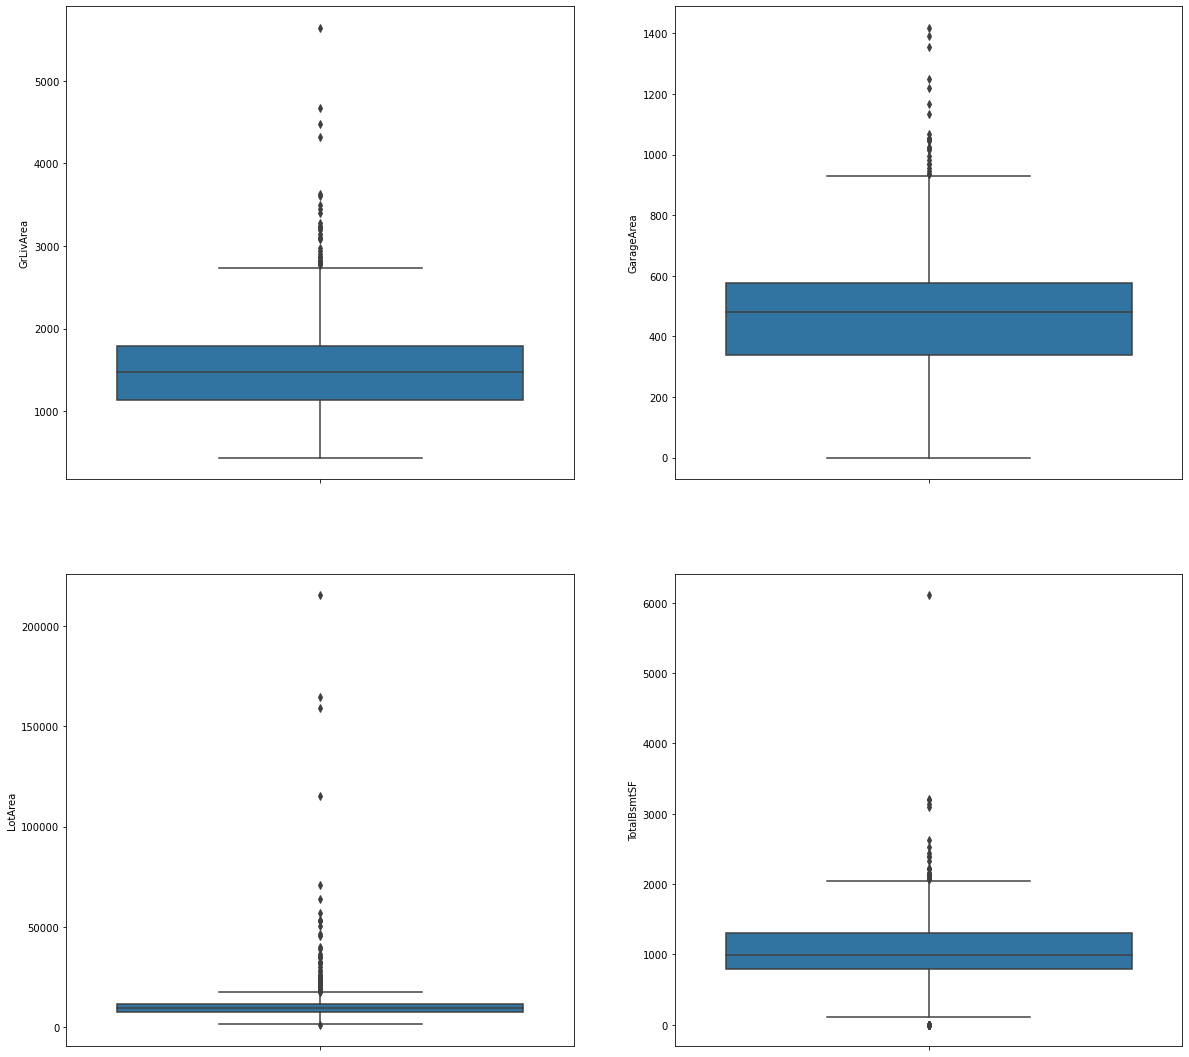

In [22]:
plt.figure(figsize=(20,40))
i =1
outlier_cols= ['GrLivArea','GarageArea','LotArea','TotalBsmtSF']#df.select_dtypes(include='number')
for col in outlier_cols:
    plt.subplot(4,2,i)
    sns.boxplot(y=col,data=df)
    i= i +1

In [23]:
def remove_outlier(df,col):
    i_rows,i_cols = df.shape
    Q1=df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR = Q3-Q1
    df= df[~((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR)))]
    f_rows,f_cols = df.shape
    print('{} outliers has been removed in {}'.format(i_rows-f_rows,col))
    return df

In [24]:
for col in outlier_cols:
    df = remove_outlier(df,col)
df.shape

31 outliers has been removed in GrLivArea
17 outliers has been removed in GarageArea
67 outliers has been removed in LotArea
45 outliers has been removed in TotalBsmtSF


(1280, 73)

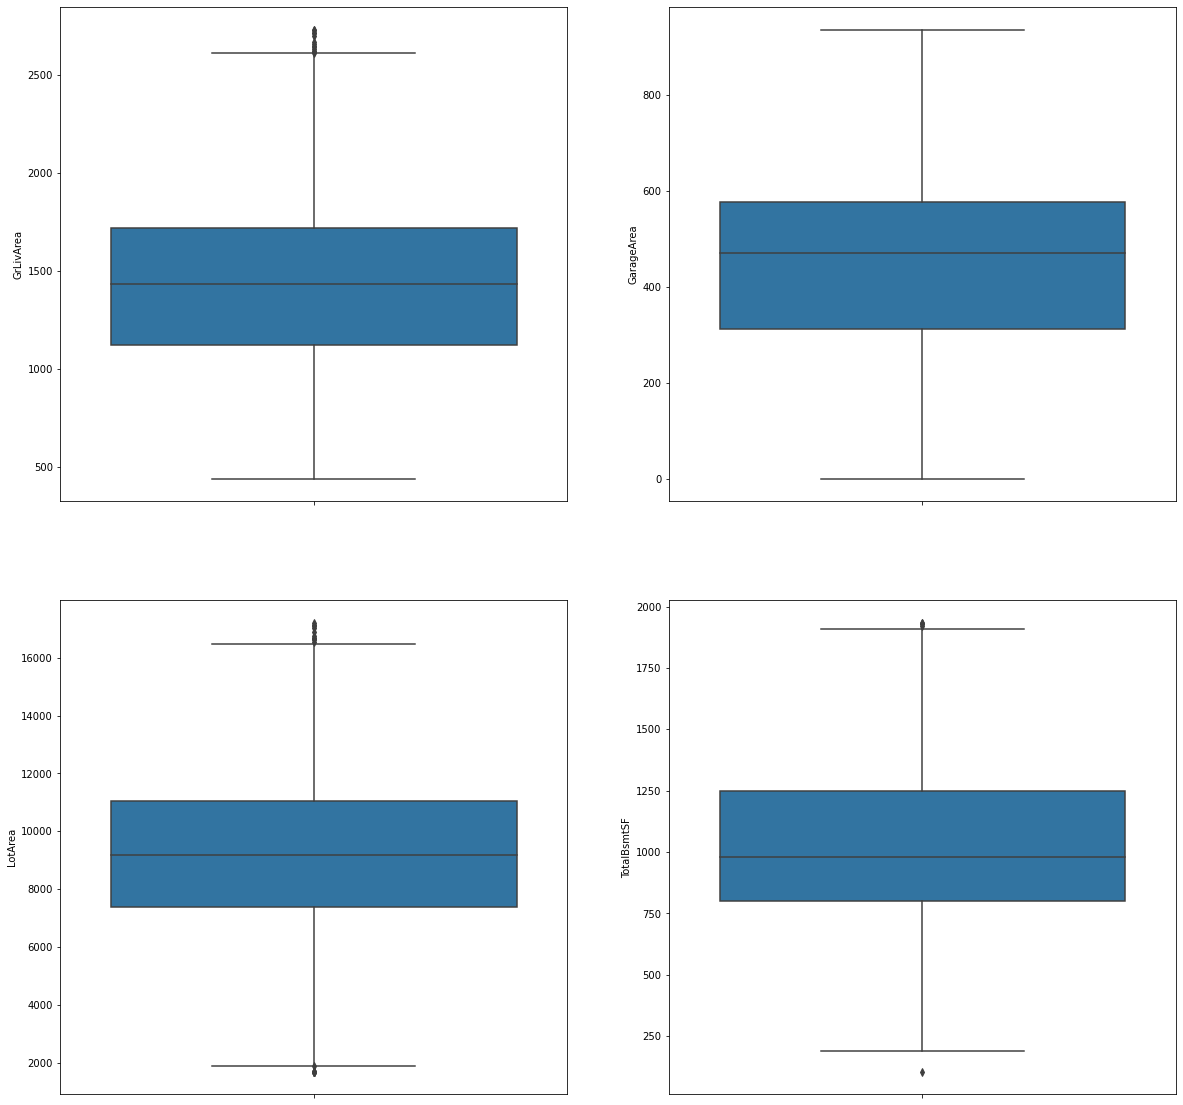

In [25]:
# After outlier treatement , lets look at the columns again.
plt.figure(figsize=(20,20))
i =1
for col in outlier_cols:
    plt.subplot(2,2,i)
    sns.boxplot(y=col,data=df)
    i= i +1

In [26]:
#Splitting the data into input and output
y=df.pop('SalePrice')
X=df

### Encoding categorical variables

In [27]:
categorical_columns = df.select_dtypes(include='object')

In [28]:
for col in categorical_columns:
    cat_df = pd.get_dummies(df[col],prefix=col+"_",drop_first=True)
    df = pd.concat([df,cat_df],axis=1)

In [29]:
df.drop(categorical_columns,axis=1,inplace=True) 


### Correlation between variables

<AxesSubplot:>

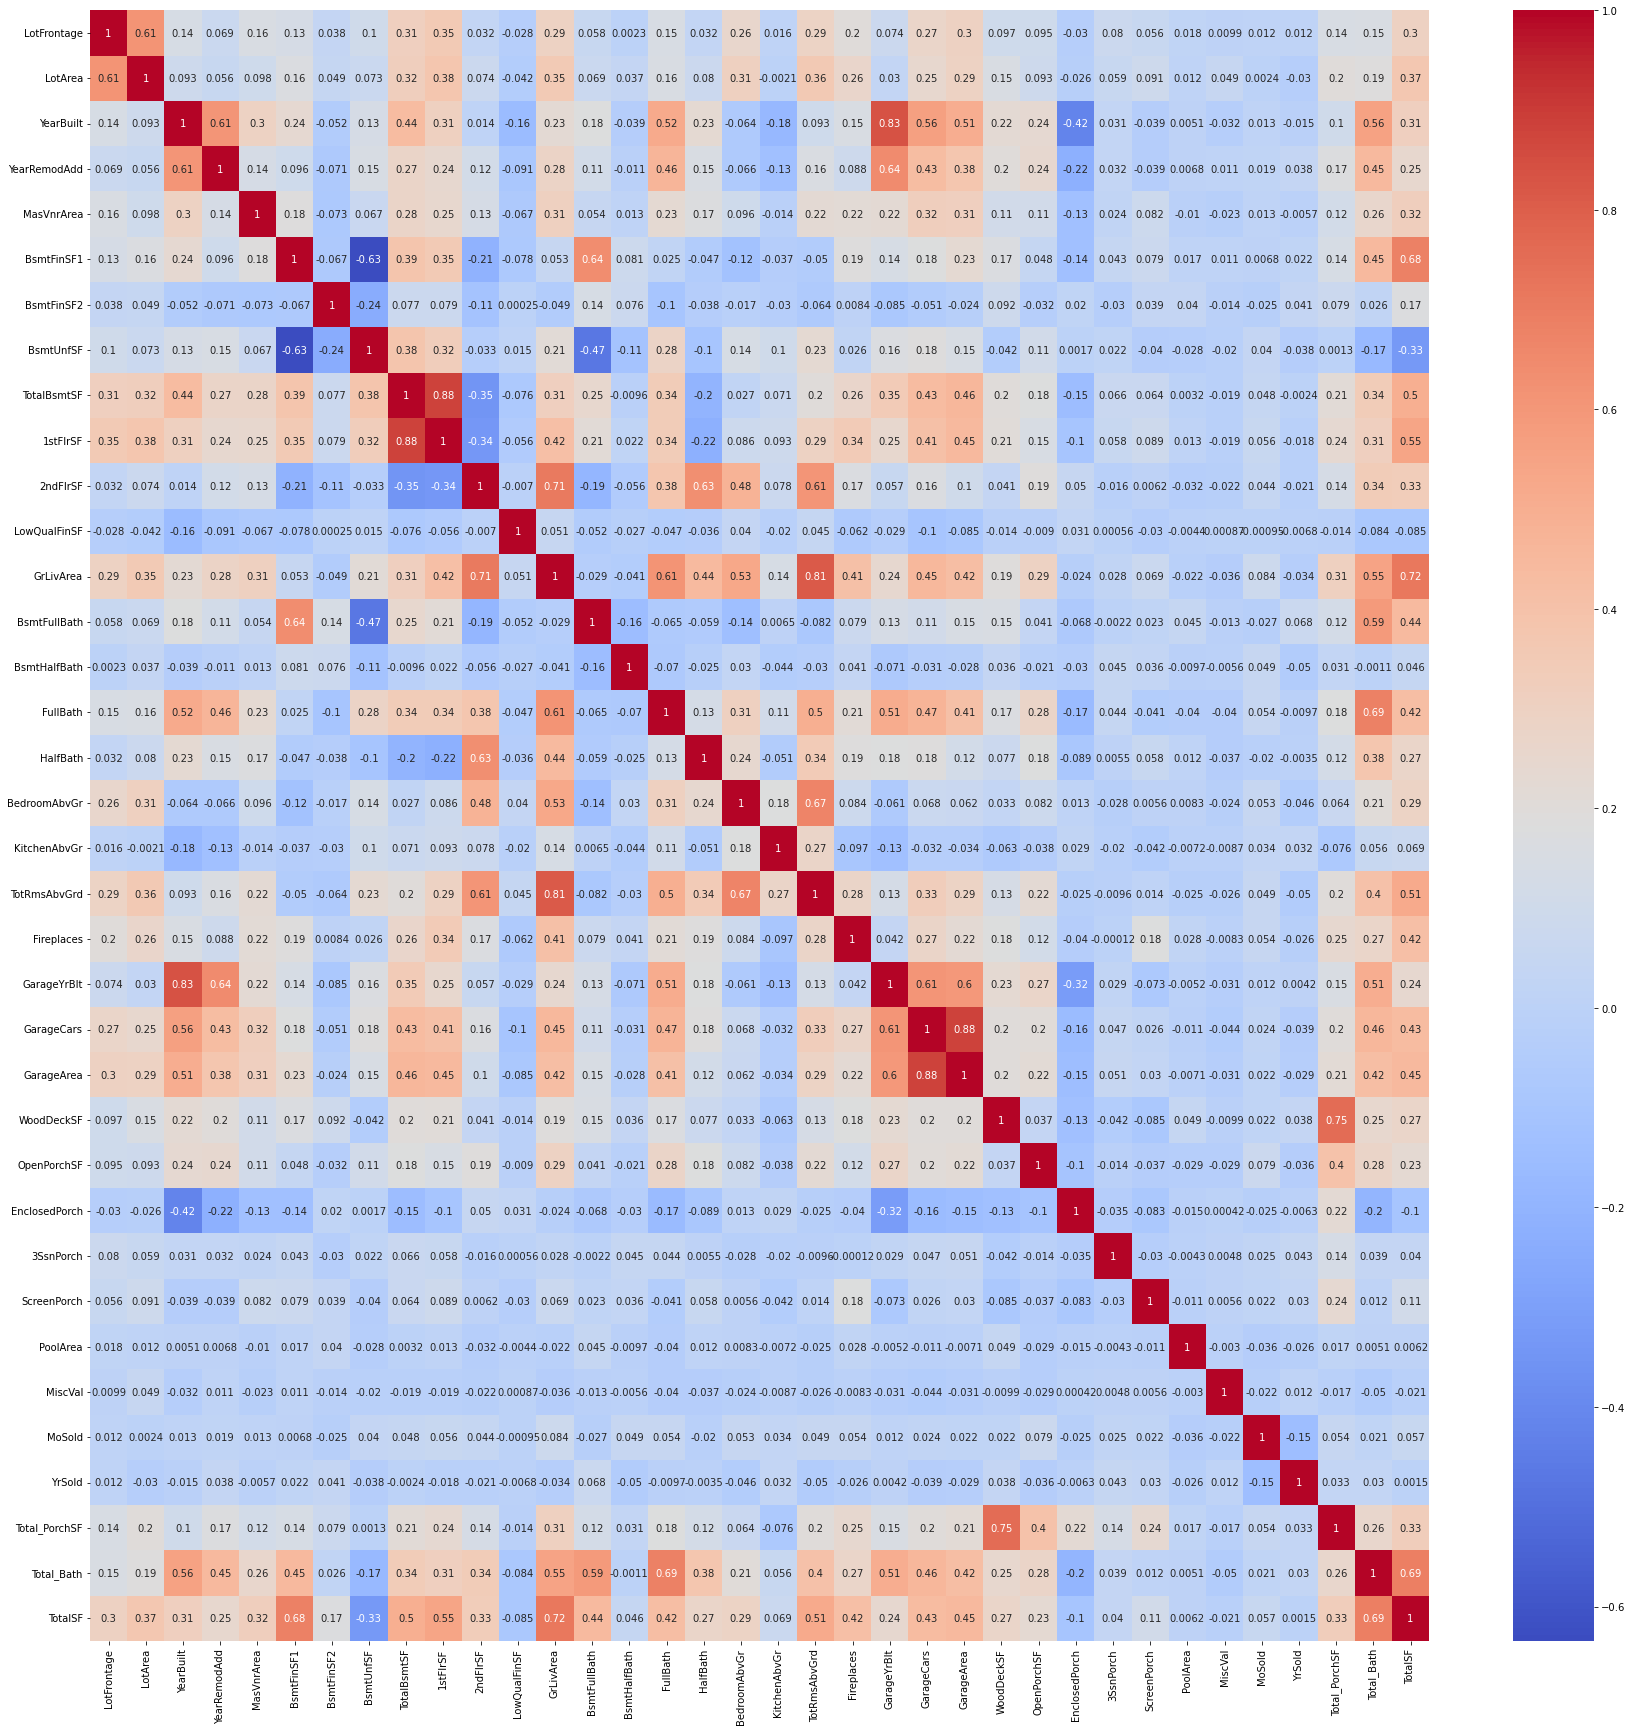

In [30]:
corr_mat = X.corr()
plt.figure(figsize=(30,30))
sns.heatmap(X.corr(),annot=True,cmap='coolwarm')

In [31]:
def get_redundant_pairs(s):
    '''Get correlation with same pairs remove the values'''
    pairs_to_drop = set()
    cols = s.keys()
    for k1,k2 in cols:
        if(k1==k2):
            pairs_to_drop.add((k1,k2))
    return pairs_to_drop

def get_top_abs_correlations(df, c=0.8):
    corr = df.corr()
    corr_1= corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool_))
    au_corr = corr_1.stack()
    #print(set(au_corr.index.get_level_values(1)))
    #au_corr[abs(au_corr)>c].to_csv("corr.csv")
    #au_corr = df.corr().abs().unstack()
    #labels_to_drop = get_redundant_pairs(au_corr)
    #au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[abs(au_corr)>c]


In [32]:
print(get_top_abs_correlations(df,c=0.7))

YearBuilt             GarageYrBlt               0.834786
MasVnrArea            MasVnrType__None         -0.705693
BsmtFinSF1            BsmtFinType1__Unf        -0.704532
BsmtFinSF2            BsmtFinType2__Unf        -0.798939
TotalBsmtSF           1stFlrSF                  0.883695
2ndFlrSF              GrLivArea                 0.711659
                      MSSubClass__60            0.704938
                      HouseStyle__1Story       -0.794271
                      HouseStyle__2Story        0.838764
GrLivArea             TotRmsAbvGrd              0.811665
                      TotalSF                   0.717584
GarageCars            GarageArea                0.882824
WoodDeckSF            Total_PorchSF             0.751428
MSSubClass__45        HouseStyle__1.5Unf        0.925090
MSSubClass__60        HouseStyle__2Story        0.754284
MSSubClass__75        HouseStyle__2.5Unf        0.760817
MSSubClass__80        HouseStyle__SLvl          0.944548
MSSubClass__85        HouseStyl

In [33]:
df.drop(['GarageYrBlt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF',
         '2ndFlrSF','GrLivArea','GarageCars','WoodDeckSF','MSSubClass__45',
         'MSSubClass__60','MSSubClass__75','MSSubClass__80','MSSubClass__85',
         'MSSubClass__90','MSSubClass__120','MSSubClass__190','MSZoning__FV',
         'MSZoning__RL','RoofStyle__Gable','Exterior1st__CBlock','Exterior1st__CemntBd',
         'Exterior1st__HdBoard','Exterior1st__MetalSd','Exterior1st__Plywood','Exterior1st__Stone',
         'Exterior1st__Stucco','Exterior1st__VinylSd','Exterior1st__Wd Sdng','MasVnrType__BrkFace',
         'ExterQual__Gd','ExterCond__Gd','Foundation__CBlock','BsmtQual__Gd','BsmtCond__Gd','BsmtCond__Po',
         'KitchenQual__Gd','GarageType__Attchd','GarageQual__TA','SaleType__New','SaleType__WD'
],axis=1,inplace=True)

In [34]:
df.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  BsmtUnfSF  1stFlrSF  \
0         65.0   8450.0     2003.0        2003.0      150.0     856.0   
1         80.0   9600.0     1976.0        1976.0      284.0    1262.0   
2         68.0  11250.0     2001.0        2002.0      434.0     920.0   
3         60.0   9550.0     1915.0        1970.0      540.0     961.0   
4         84.0  14260.0     2000.0        2000.0      490.0    1145.0   

   LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0           0.0           1.0           0.0       2.0       1.0           3.0   
1           0.0           0.0           1.0       2.0       0.0           3.0   
2           0.0           1.0           0.0       2.0       1.0           3.0   
3           0.0           1.0           0.0       1.0       0.0           3.0   
4           0.0           1.0           0.0       2.0       1.0           4.0   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  OpenPorchSF  \
0           1.0           8.0         0.0       548.0         61.0   
1           1.0           6.0         1.0       460.0          0.0   
2           1.0           6.0         1.0       608.0         42.0   
3           1.0           7.0         1.0       642.0         35.0   
4           1.0           9.0         1.0       836.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0   
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3          272.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   

   Total_PorchSF  Total_Bath  TotalSF  MSSubClass__30  MSSubClass__40  \
0           61.0         3.5   2416.0               0               0   
1          298.0         2.5   2240.0               0               0   
2           42.0         3.5   2272.0               0               0   
3          307.0         2.0   1933.0               0               0   
4          276.0         3.5   2853.0               0               0   

   MSSubClass__50  MSSubClass__70  MSSubClass__160  MSSubClass__180  \
0               0               0                0                0   
1               0               0                0                0   
2               0               0                0                0   
3               0               1                0                0   
4               0               0                0                0   

   MSZoning__RH  MSZoning__RM  LotShape__IR2  LotShape__IR3  LotShape__Reg  \
0             0             0              0              0              1   
1             0             0              0              0              1   
2             0             0              0              0              0   
3             0             0              0              0              0   
4             0             0              0              0              0   

   LandContour__HLS  LandContour__Low  LandContour__Lvl  LotConfig__CulDSac  \
0                 0                 0                 1                   0   
1                 0                 0                 1                   0   
2                 0                 0                 1                   0   
3                 0                 0                 1                   0   
4                 0                 0                 1                   0   

   LotConfig__FR2  LotConfig__FR3  LotConfig__Inside  LandSlope__Mod  \
0               0               0                  1               0   
1               1               0                  0               0   
2               0               0                  1               0   
3               0               0                  0               0   
4          

### Split data for training and testing.

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test= train_test_split(df,y, train_size = 0.7, test_size = 0.3, random_state = 100)


## 7. Scale the model for training.
    If there is varying scale across the variables it would be difficult to interpret the coffecients at the end.So the model should have scaled data where the variable values lies in the same range. This can be done using minmaxscaler.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

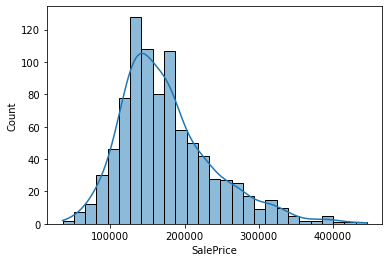

In [36]:
sns.histplot(y_train,kde=True)

In [37]:
#Right skewed data so applying transformation to get gaussian distribution.
pt = PowerTransformer(method='box-cox',standardize=False)
y_train =pt.fit_transform(y_train.to_frame())
y_test =pd.DataFrame(pt.transform(y_test.to_frame()))

<AxesSubplot:ylabel='Count'>

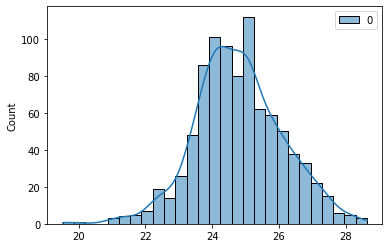

In [38]:
sns.histplot(y_train,kde=True)

In [39]:
scaler = MinMaxScaler()

#lr_model = make_pipeline(scaler, LinearRegression())
num_vars= X_train.select_dtypes(include='number').columns
X_train.loc[:,num_vars] = scaler.fit_transform(X_train.loc[:,num_vars])
X_train.head()
X_test.loc[:,num_vars] = scaler.transform(X_test.loc[:,num_vars])

C:\Users\idhay\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\idhay\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


## 8. Recursive feature elimination
    Since we have close to 60+ columns, it wouldn't make sense to try out all the columns which might result in multicolinearity.To avoid such cases let us go through RFE to select the features which is of significance and then test it out iteratively in our linear model

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_features(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


In [41]:
lm = LinearRegression()
#lm1= make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
#lm=make_pipeline(scaler, LinearRegression())
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
rfe = RFE(lm, n_features_to_select=25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
sorted(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),key= lambda x:x[2])

[('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('BsmtUnfSF', True, 1),
 ('KitchenAbvGr', True, 1),
 ('GarageArea', True, 1),
 ('TotalSF', True, 1),
 ('LandSlope__Sev', True, 1),
 ('Neighborhood__Crawfor', True, 1),
 ('Condition1__RRAe', True, 1),
 ('OverallQual__3', True, 1),
 ('OverallQual__4', True, 1),
 ('OverallQual__5', True, 1),
 ('OverallQual__6', True, 1),
 ('OverallQual__7', True, 1),
 ('OverallQual__8', True, 1),
 ('OverallQual__9', True, 1),
 ('OverallQual__10', True, 1),
 ('Exterior1st__BrkComm', True, 1),
 ('Foundation__Wood', True, 1),
 ('Electrical__FuseP', True, 1),
 ('Functional__Maj2', True, 1),
 ('Functional__Mod', True, 1),
 ('GarageQual__Po', True, 1),
 ('SaleType__Oth', True, 1),
 ('SaleCondition__Alloca', True, 1),
 ('YearRemodAdd', False, 2),
 ('SaleType__Con', False, 3),
 ('OverallCond__3', False, 4),
 ('Neighborhood__BrDale', False, 5),
 ('OverallCond__4', False, 6),
 ('Total_PorchSF', False, 7),
 ('Foundation__Stone', False, 8),
 ('Total_Bath', False, 9),
 

In [44]:
print("Columns supported by RFE:",X_train.columns[rfe.support_])
rfe_cols = list(X_train.columns[rfe.support_])

Columns supported by RFE: Index(['LotArea', 'YearBuilt', 'BsmtUnfSF', 'KitchenAbvGr', 'GarageArea',
       'TotalSF', 'LandSlope__Sev', 'Neighborhood__Crawfor',
       'Condition1__RRAe', 'OverallQual__3', 'OverallQual__4',
       'OverallQual__5', 'OverallQual__6', 'OverallQual__7', 'OverallQual__8',
       'OverallQual__9', 'OverallQual__10', 'Exterior1st__BrkComm',
       'Foundation__Wood', 'Electrical__FuseP', 'Functional__Maj2',
       'Functional__Mod', 'GarageQual__Po', 'SaleType__Oth',
       'SaleCondition__Alloca'],
      dtype='object')


In [45]:
print("Columns NOT supported by RFE:",X_train.columns[~rfe.support_])

Columns NOT supported by RFE: Index(['LotFrontage', 'YearRemodAdd', '1stFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd',
       ...
       'PavedDrive__Y', 'SaleType__CWD', 'SaleType__Con', 'SaleType__ConLD',
       'SaleType__ConLI', 'SaleType__ConLw', 'SaleCondition__AdjLand',
       'SaleCondition__Family', 'SaleCondition__Normal',
       'SaleCondition__Partial'],
      dtype='object', length=170)


## 9. Model selection
    Run the models with varying set of parameters to understand its impact and use VIF to understand the inflation factor and remove the variables with high inflation factor.

In [46]:
import statsmodels.api as sm  
X_train_rfe= sm.add_constant(X_train)
X_train_rfe.head()
X_test_rfe = sm.add_constant(X_test)

C:\Users\idhay\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
#Adding ;More variables as p value is less than 0,05, Adding yearbuilt based on business understanding.

In [48]:
rfe_cols = list(X_train.columns[rfe.support_])
rfe_cols.append("const")
lm1 = sm.OLS(y_train,X_train_rfe[rfe_cols]).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     287.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:17:53   Log-Likelihood:                -511.65
No. Observations:                 896   AIC:                             1075.
Df Residuals:                     870   BIC:                             1200.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                   0.6556      0.084      7.768      0.000       0.490       0.821
YearBuilt                 1.3742      0.094     14.651      0.000       1.190       1.558
BsmtUnfSF                 1.0019      0.092     10.868      0.000       0.821       1.183
KitchenAbvGr             -1.2277      0.259     -4.748      0.000      -1.735      -0.720
GarageArea                0.6460      0.094      6.873      0.000       0.461       0.830
TotalSF                   3.4223      0.140     24.498      0.000       3.148       3.697
LandSlope__Sev           -1.1658      0.437     -2.668      0.008      -2.023      -0.308
Neighborhood__Crawfor     0.7021      0.081      8.647      0.000       0.543       0.861
Condition1__RRAe         -0.6240      0.157     -3.987      0.000      -0.931      -0.317
OverallQual__3            1.2264      0.297      4.130      0.000       0.644       1.809
OverallQual__4            1.3692      0.261      5.256      0.000       0.858       1.881
OverallQual__5            1.8469      0.256      7.210      0.000       1.344       2.350
OverallQual__6            2.1020      0.258      8.134      0.000       1.595       2.609
OverallQual__7            2.4541      0.263      9.340      0.000       1.938       2.970
OverallQual__8            2.8441      0.270     10.551      0.000       2.315       3.373
OverallQual__9            3.2288      0.285     11.318      0.000       2.669       3.789
OverallQual__10           3.4167      0.368      9.273      0.000       2.694       4.140
Exterior1st__BrkComm     -2.1474      0.488     -4.400      0.000      -3.105      -1.189
Foundation__Wood         -0.7709      0.310     -2.484      0.013      -1.380      -0.162
Electrical__FuseP        -0.9389      0.438     -2.145      0.032      -1.798      -0.080
Functional__Maj2         -0.9254      0.235     -3.942      0.000      -1.386      -0.465
Functional__Mod          -0.6342      0.220     -2.889      0.004      -1.065      -0.203
GarageQual__Po           -0.7544      0.333     -2.265      0.024      -1.408      -0.101
SaleType__Oth             0.5445      0.317      1.718      0.086      -0.077       1.166
SaleCondition__Alloca    -0.9228      0.309     -2.983      0.003      -1.530      -0.316
const                    19.7818      0.272     72.727      0.000      19.248      20.316
==============================================================================
Omnibus:                      157.476   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              821.332
Skew:                          -0.693   Prob(JB):                    4.47e-179
Kurtosis:                       7.481   Cond. No.                         87.4
==============================================================================

In [49]:
y_test_predict =pd.DataFrame(lm1.predict(X_test_rfe[rfe_cols]))
y_test_predict=y_test_predict.reset_index()
y_test_predict.drop(['index'],axis=1,inplace=True)
#print(y_test_predict.shape,y_test.shape,(y_test-y_test_predict).shape)
#y_test_predict

C:\Users\idhay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

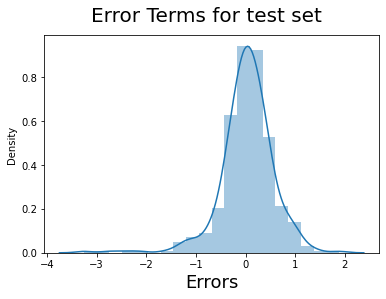

In [50]:

fig = plt.figure()
sns.distplot((y_test- y_test_predict), bins = 20)
fig.suptitle('Error Terms for test set', fontsize = 20)              # Plot heading 
plt.xlabel('Errors', fontsize = 18)                          # X-label

(384, 1) (384, 1)


Text(0, 0.5, 'error')

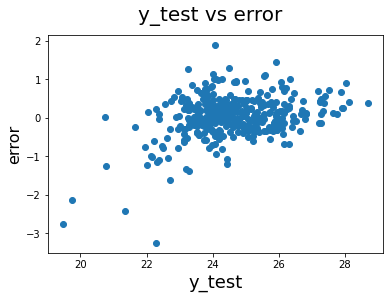

In [51]:
fig = plt.figure()
print(y_test.shape,(y_test-y_test_predict).shape)
plt.scatter(y_test,y_test-y_test_predict)
fig.suptitle('y_test vs error', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('error', fontsize=16)  

In [52]:
# Building Lasso Regression

In [53]:
lambdas = 10**np.linspace(1,-3,100)
lassocv = LassoCV(alphas= lambdas,cv=10,normalize=True)
lassocv.fit(X_train,y_train)
lassocv.alpha_

C:\Users\idhay\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.001

In [54]:
lassocv.coef_

array([ 0.        ,  0.3788556 ,  0.62550672,  0.38048793,  0.75665475,
        0.        , -0.        , -0.        ,  0.        ,  0.07965358,
        0.04825082,  0.        , -0.7081183 ,  0.27518261,  0.38117912,
        0.67219668,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.33269068,
        0.11980109,  3.07724116, -0.0990975 , -0.        ,  0.        ,
        0.        , -0.07871179, -0.        , -0.        , -0.05126342,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.62188418,  0.        , -0.        ,  0.10489305,
        0.        , -0.        ,  0.3766308 , -0.08560479,  0.        ,
       -0.19701164, -0.1129564 , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.09636865, -0.01459081,  0.        ,
       -0.        , -0.        ,  0.08718319,  0.09775763, -0.  

In [55]:
lassoreg = Lasso(alpha = lassocv.alpha_,normalize=True)
lassoreg.fit(X_train,y_train)
y_test_predict_lasso = lassoreg.predict(X_test)

In [56]:
r2_score(y_test,y_test_predict_lasso)

0.8706911442908258

In [57]:
## Ridge Regression

In [58]:
lambdas = 10**np.linspace(1,-3,100)

In [59]:
ridgecv = RidgeCV(alphas = lambdas,cv=10,normalize=True)
ridgecv.fit(X_train,y_train)
ridgecv.alpha_

0.22051307399030445

In [60]:
ridgereg = Ridge(alpha = ridgecv.alpha_,normalize=True)
ridgereg.fit(X_train,y_train)
y_test_predict_ridge = ridgereg.predict(X_test)

In [61]:
print(y_test.shape,y_test_predict_lasso.shape)

(384, 1) (384,)


In [62]:
model_comp = pd.DataFrame({"R2 Score":r2_score(y_test,y_test_predict)
                           ,"RSS":np.sum(np.square(y_test-y_test_predict))[0],
                           "MSE":mean_squared_error(y_test,y_test_predict),
                           "RMSE":mean_squared_error(y_test,y_test_predict)**0.5},
                          index=['Linear Regression'])

In [63]:
model_comp = model_comp.append( pd.DataFrame({"R2 Score":r2_score(y_test,y_test_predict_lasso),
                            "RSS":np.sum(np.square(y_test-y_test_predict_lasso.reshape(-1,1)))[0],
                            "MSE":mean_squared_error(y_test,y_test_predict_lasso),
                            "RMSE":mean_squared_error(y_test,y_test_predict_lasso)**0.5},
                                index=['Lasso Regression']))

In [64]:
model_comp = model_comp.append( pd.DataFrame({"R2 Score":r2_score(y_test,y_test_predict_ridge)
                           ,"RSS":np.sum(np.square(y_test-y_test_predict_ridge))[0],
                            "MSE":mean_squared_error(y_test,y_test_predict_ridge),
                            "RMSE":mean_squared_error(y_test,y_test_predict_ridge)**0.5},
                                index=['Ridge Regression']))

In [65]:
model_comp.head()

R2 Score         RSS       MSE      RMSE
Linear Regression  0.833599  112.804997  0.293763  0.541999
Lasso Regression   0.870691   87.659634  0.228280  0.477787
Ridge Regression   0.872305   86.565698  0.225432  0.474796

In [66]:
lassoreg2 = Lasso(alpha = lassocv.alpha_*2,normalize=True)
lassoreg2.fit(X_train,y_train)
y_test_predict_lasso = lassoreg2.predict(X_test)

In [67]:
{"R2 Score":r2_score(y_test,y_test_predict_lasso),
                            "RSS":np.sum(np.square(y_test-y_test_predict_lasso.reshape(-1,1)))[0],
                            "MSE":mean_squared_error(y_test,y_test_predict_lasso),
                            "RMSE":mean_squared_error(y_test,y_test_predict_lasso)**0.5}

{'R2 Score': 0.8431213576012969,
 'RSS': 106.3494394551403,
 'MSE': 0.2769516652477612,
 'RMSE': 0.5262619739709123}

In [68]:
ridgereg2 = Ridge(alpha = ridgecv.alpha_*2,normalize=True)
ridgereg2.fit(X_train,y_train)
y_test_predict_ridge = ridgereg2.predict(X_test)

In [69]:
{"R2 Score":r2_score(y_test,y_test_predict_ridge)
                           ,"RSS":np.sum(np.square(y_test-y_test_predict_ridge))[0],
                            "MSE":mean_squared_error(y_test,y_test_predict_ridge),
                            "RMSE":mean_squared_error(y_test,y_test_predict_ridge)**0.5}

{'R2 Score': 0.8682591663800185,
 'RSS': 89.30829330630252,
 'MSE': 0.2325736804851628,
 'RMSE': 0.4822589351014274}

In [70]:
betas = pd.DataFrame(index=X_train.columns)
betas['Lasso Coefficient'] = lassoreg.coef_.T
betas['Ridge Coefficient'] = ridgereg.coef_.T
betas['Lasso 2 Coefficient'] = lassoreg2.coef_.T
betas['Ridge 2 Coefficient'] = ridgereg2.coef_.T


### Subjective questions

In [71]:
#Question 1:
betas.sort_values(by='Lasso Coefficient',ascending=False)
# TotalSF is the important coefficient in Lasso Regression with optimized alpha.

Lasso Coefficient  Ridge Coefficient  \
TotalSF                          3.077241           1.198866   
BsmtUnfSF                        0.756655           0.246054   
GarageArea                       0.672197           0.549579   
YearBuilt                        0.625507           0.351792   
OverallQual__9                   0.568712           0.546129   
Fireplaces                       0.381179           0.345182   
YearRemodAdd                     0.380488           0.197200   
LotArea                          0.378856           0.379712   
Neighborhood__Crawfor            0.376631           0.324432   
OverallQual__8                   0.368593           0.291022   
OverallQual__10                  0.348098           0.526912   
Total_PorchSF                    0.332691           0.299209   
CentralAir__Y                    0.327650           0.312798   
TotRmsAbvGrd                     0.275183           0.404662   
SaleCondition__Partial           0.197219           0.267888   
Functional__Typ                  0.157936           0.124228   
Exterior1st__BrkFace             0.148846           0.341139   
Foundation__PConc                0.132739           0.098688   
Total_Bath                       0.119801           0.424901   
OverallQual__7                   0.105699           0.082773   
Neighborhood__BrkSide            0.104893           0.161106   
Neighborhood__StoneBr            0.097758           0.400989   
Neighborhood__NridgHt            0.096369           0.273295   
Neighborhood__Somerst            0.087183           0.167475   
FullBath                         0.079654           0.299567   
Condition1__Norm                 0.068193           0.134096   
OverallCond__7                   0.063616           0.123111   
HalfBath                         0.048251           0.212408   
BsmtExposure__Gd                 0.043043           0.166324   
SaleCondition__Normal            0.028745           0.116042   
BsmtFinType1__GLQ                0.009931           0.069190   
GarageCond__TA                   0.009111           0.088186   
ExterCond__Fa                   -0.000000          -0.077314   
ExterCond__Po                    0.000000           0.000000   
ExterCond__TA                    0.000000           0.073201   
BsmtCond__TA                     0.000000           0.026169   
Foundation__Stone                0.000000           0.228576   
BsmtQual__Fa                    -0.000000          -0.065772   
BsmtExposure__No                -0.000000          -0.048174   
BsmtExposure__Mn                -0.000000          -0.049274   
BsmtFinType1__BLQ               -0.000000          -0.077191   
MasVnrType__Stone                0.000000           0.070084   
RoofStyle__Gambrel              -0.000000          -0.091967   
MasVnrType__None                -0.000000          -0.029582   
Exterior2nd__Wd Shng            -0.000000          -0.140242   
RoofStyle__Mansard               0.000000           0.429168   
Exterior1st__ImStucc            -0.000000          -0.017151   
Exterior1st__WdShing            -0.000000          -0.035956   
Exterior2nd__AsphShn             0.000000           0.341361   
Exterior2nd__Brk Cmn            -0.000000          -0.030616   
Exterior2nd__BrkFace             0.000000          -0.136332   
Exterior2nd__CBlock             -0.000000          -0.172739   
Exterior2nd__CmentBd             0.000000           0.125880   
Exterior2nd__HdBoard            -0.000000          -0.050857   
Exterior2nd__ImStucc            -0.000000          -0.016387   
Exterior2nd__MetalSd             0.000000           0.048701   
Exterior2nd__Other               0.000000           0.000000   
Exterior2nd__Plywood            -0.000000          -0.031002   
Exterior2nd__Stone               0.000000           0.211585   
Exterior2nd__Stucco              0.000000           0.208043   
BsmtFinType1__LwQ               -0.000000          -0.083641   
Exterior2nd__Wd Sdng            -0.000000          -0.02

In [72]:
betas.sort_values(by='Lasso 2 Coefficient',ascending=False)
# TotalSF is the important coefficient in Lasso Regression with doubled alpha.

Lasso Coefficient  Ridge Coefficient  \
TotalSF                          3.077241           1.198866   
GarageArea                       0.672197           0.549579   
YearBuilt                        0.625507           0.351792   
BsmtUnfSF                        0.756655           0.246054   
Fireplaces                       0.381179           0.345182   
YearRemodAdd                     0.380488           0.197200   
OverallQual__9                   0.568712           0.546129   
TotRmsAbvGrd                     0.275183           0.404662   
LotArea                          0.378856           0.379712   
CentralAir__Y                    0.327650           0.312798   
OverallQual__8                   0.368593           0.291022   
Total_PorchSF                    0.332691           0.299209   
Neighborhood__Crawfor            0.376631           0.324432   
Foundation__PConc                0.132739           0.098688   
SaleCondition__Partial           0.197219           0.267888   
FullBath                         0.079654           0.299567   
Functional__Typ                  0.157936           0.124228   
1stFlrSF                         0.000000           0.720903   
OverallQual__7                   0.105699           0.082773   
Neighborhood__NridgHt            0.096369           0.273295   
Foundation__Stone                0.000000           0.228576   
MasVnrType__None                -0.000000          -0.029582   
MasVnrType__Stone                0.000000           0.070084   
ExterQual__Fa                   -0.076369          -0.219297   
ExterCond__Fa                   -0.000000          -0.077314   
ExterCond__Po                    0.000000           0.000000   
ExterCond__TA                    0.000000           0.073201   
BsmtExposure__No                -0.000000          -0.048174   
BsmtFinType1__GLQ                0.009931           0.069190   
BsmtFinType1__BLQ               -0.000000          -0.077191   
BsmtQual__Fa                    -0.000000          -0.065772   
BsmtCond__TA                     0.000000           0.026169   
BsmtExposure__Gd                 0.043043           0.166324   
BsmtExposure__Mn                -0.000000          -0.049274   
Exterior2nd__Wd Shng            -0.000000          -0.140242   
Foundation__Wood                -0.053015          -0.669692   
Exterior2nd__MetalSd             0.000000           0.048701   
Exterior2nd__Wd Sdng            -0.000000          -0.025855   
Exterior2nd__BrkFace             0.000000          -0.136332   
RoofStyle__Hip                   0.000000           0.065007   
RoofStyle__Mansard               0.000000           0.429168   
Exterior1st__BrkComm            -0.404557          -0.582312   
Exterior1st__BrkFace             0.148846           0.341139   
Exterior1st__ImStucc            -0.000000          -0.017151   
Exterior1st__WdShing            -0.000000          -0.035956   
Exterior2nd__AsphShn             0.000000           0.341361   
Exterior2nd__Brk Cmn            -0.000000          -0.030616   
Exterior2nd__CBlock             -0.000000          -0.172739   
Exterior2nd__VinylSd             0.000000           0.051282   
Exterior2nd__CmentBd             0.000000           0.125880   
Exterior2nd__HdBoard            -0.000000          -0.050857   
Exterior2nd__ImStucc            -0.000000          -0.016387   
BsmtFinType1__Rec                0.000000           0.006922   
Exterior2nd__Other               0.000000           0.000000   
Exterior2nd__Plywood            -0.000000          -0.031002   
Exterior2nd__Stone               0.000000           0.211585   
Exterior2nd__Stucco              0.000000           0.208043   
BsmtFinType1__LwQ               -0.000000          -0.083641   
BsmtFinType2__Unf                0.000000          -0.012135   
BsmtFinType1__Unf                0.000000          -0.061742   
BsmtFinType2__BLQ               -0.000000          -0.134219   
GarageQual__Fa                  -0.000000          -0.08

In [73]:
betas.sort_values(by='Ridge Coefficient',ascending=False)
# TotalSF is the important coefficient in Ridge Regression with optimized alpha.

Lasso Coefficient  Ridge Coefficient  \
TotalSF                          3.077241           1.198866   
1stFlrSF                         0.000000           0.720903   
GarageArea                       0.672197           0.549579   
OverallQual__9                   0.568712           0.546129   
OverallQual__10                  0.348098           0.526912   
RoofStyle__Mansard               0.000000           0.429168   
Total_Bath                       0.119801           0.424901   
SaleType__Oth                    0.000000           0.422717   
TotRmsAbvGrd                     0.275183           0.404662   
Neighborhood__StoneBr            0.097758           0.400989   
LotArea                          0.378856           0.379712   
YearBuilt                        0.625507           0.351792   
Fireplaces                       0.381179           0.345182   
Exterior2nd__AsphShn             0.000000           0.341361   
Exterior1st__BrkFace             0.148846           0.341139   
Neighborhood__Crawfor            0.376631           0.324432   
CentralAir__Y                    0.327650           0.312798   
FullBath                         0.079654           0.299567   
Total_PorchSF                    0.332691           0.299209   
SaleType__Con                    0.000000           0.295927   
OverallQual__8                   0.368593           0.291022   
OverallCond__9                   0.000000           0.289850   
Neighborhood__NridgHt            0.096369           0.273295   
SaleCondition__Partial           0.197219           0.267888   
HouseStyle__2.5Unf               0.000000           0.257341   
BsmtUnfSF                        0.756655           0.246054   
Foundation__Stone                0.000000           0.228576   
Neighborhood__Veenker            0.000000           0.219371   
3SsnPorch                        0.000000           0.216460   
Condition1__PosA                 0.000000           0.215542   
HalfBath                         0.048251           0.212408   
Exterior2nd__Stone               0.000000           0.211585   
Neighborhood__NoRidge            0.000000           0.211141   
BedroomAbvGr                     0.000000           0.209487   
Exterior2nd__Stucco              0.000000           0.208043   
YearRemodAdd                     0.380488           0.197200   
Condition1__PosN                 0.000000           0.187166   
Condition1__RRNn                 0.000000           0.181894   
Neighborhood__NPkVill            0.000000           0.181150   
Neighborhood__Somerst            0.087183           0.167475   
BsmtExposure__Gd                 0.043043           0.166324   
Neighborhood__BrkSide            0.104893           0.161106   
ScreenPorch                      0.000000           0.157133   
SaleType__ConLD                  0.000000           0.156665   
LotFrontage                      0.000000           0.152973   
Condition1__Norm                 0.068193           0.134096   
Neighborhood__ClearCr            0.000000           0.129843   
Exterior2nd__CmentBd             0.000000           0.125880   
Functional__Typ                  0.157936           0.124228   
OverallCond__7                   0.063616           0.123111   
OpenPorchSF                      0.000000           0.122006   
PoolArea                         0.000000           0.120519   
OverallCond__8                   0.000000           0.117861   
SaleCondition__Normal            0.028745           0.116042   
HeatingQC__Po                    0.000000           0.111549   
MSSubClass__50                   0.000000           0.104889   
PavedDrive__Y                    0.000000           0.101579   
Foundation__PConc                0.132739           0.098688   
MSSubClass__70                   0.000000           0.094991   
GarageType__BuiltIn              0.000000           0.091285   
GarageCond__Po                  -0.000000           0.089536   
GarageCond__TA                   0.009111           0.08

In [74]:
betas.sort_values(by='Ridge 2 Coefficient',ascending=False)
# TotalSF is the important coefficient in Ridge Regression with doubled alpha.

Lasso Coefficient  Ridge Coefficient  \
TotalSF                          3.077241           1.198866   
1stFlrSF                         0.000000           0.720903   
GarageArea                       0.672197           0.549579   
OverallQual__9                   0.568712           0.546129   
OverallQual__10                  0.348098           0.526912   
TotRmsAbvGrd                     0.275183           0.404662   
Total_Bath                       0.119801           0.424901   
Fireplaces                       0.381179           0.345182   
Neighborhood__StoneBr            0.097758           0.400989   
LotArea                          0.378856           0.379712   
RoofStyle__Mansard               0.000000           0.429168   
FullBath                         0.079654           0.299567   
SaleType__Con                    0.000000           0.295927   
Total_PorchSF                    0.332691           0.299209   
Neighborhood__Crawfor            0.376631           0.324432   
Exterior1st__BrkFace             0.148846           0.341139   
SaleType__Oth                    0.000000           0.422717   
CentralAir__Y                    0.327650           0.312798   
YearBuilt                        0.625507           0.351792   
Exterior2nd__Stone               0.000000           0.211585   
OverallQual__8                   0.368593           0.291022   
Neighborhood__NridgHt            0.096369           0.273295   
OverallCond__9                   0.000000           0.289850   
Exterior2nd__AsphShn             0.000000           0.341361   
Foundation__Stone                0.000000           0.228576   
LotFrontage                      0.000000           0.152973   
SaleCondition__Partial           0.197219           0.267888   
Neighborhood__NoRidge            0.000000           0.211141   
BedroomAbvGr                     0.000000           0.209487   
HouseStyle__2.5Unf               0.000000           0.257341   
Neighborhood__Veenker            0.000000           0.219371   
3SsnPorch                        0.000000           0.216460   
YearRemodAdd                     0.380488           0.197200   
HalfBath                         0.048251           0.212408   
BsmtUnfSF                        0.756655           0.246054   
Condition1__PosA                 0.000000           0.215542   
Exterior2nd__Stucco              0.000000           0.208043   
OpenPorchSF                      0.000000           0.122006   
ScreenPorch                      0.000000           0.157133   
BsmtExposure__Gd                 0.043043           0.166324   
Condition1__PosN                 0.000000           0.187166   
Neighborhood__NPkVill            0.000000           0.181150   
Neighborhood__BrkSide            0.104893           0.161106   
Neighborhood__Somerst            0.087183           0.167475   
Condition1__RRNn                 0.000000           0.181894   
Neighborhood__ClearCr            0.000000           0.129843   
Exterior2nd__CmentBd             0.000000           0.125880   
PoolArea                         0.000000           0.120519   
GarageCond__TA                   0.009111           0.088186   
SaleType__ConLD                  0.000000           0.156665   
Condition1__Norm                 0.068193           0.134096   
PavedDrive__Y                    0.000000           0.101579   
Functional__Typ                  0.157936           0.124228   
BsmtFullBath                    -0.000000           0.073478   
OverallCond__7                   0.063616           0.123111   
Foundation__PConc                0.132739           0.098688   
OverallCond__8                   0.000000           0.117861   
GarageType__BuiltIn              0.000000           0.091285   
MasVnrType__Stone                0.000000           0.070084   
MSSubClass__70                   0.000000           0.094991   
BsmtFinType1__GLQ                0.009931           0.069190   
SaleCondition__Normal            0.028745           0.11

In [75]:
#Question 3

X_train_q3 = X_train
X_test_q3 = X_test
X_train_q3.drop(['TotalSF','GarageArea','YearBuilt','BsmtUnfSF','Fireplaces'],axis=1,inplace=True)
X_test_q3.drop(['TotalSF','GarageArea','YearBuilt','BsmtUnfSF','Fireplaces'],axis=1,inplace=True)


C:\Users\idhay\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
## Find optimized alpha value.. 

lambdas = 10**np.linspace(1,-3,100)
lassocv_q3 = LassoCV(alphas= lambdas,cv=10,normalize=True)
lassocv_q3.fit(X_train_q3,y_train)
lassocv_q3.alpha_

C:\Users\idhay\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.001

In [77]:
#Observation: Alpha value remains the same.

In [78]:
lassoreg3 = Lasso(alpha = lassocv_q3.alpha_,normalize=True)
lassoreg3.fit(X_train_q3,y_train)
y_test_predict_lasso = lassoreg3.predict(X_test_q3)

In [79]:
betas = pd.DataFrame(index=X_train_q3.columns)
betas['Lasso Q3 Coefficient'] = lassoreg3.coef_.T

In [80]:
betas.sort_values(by='Lasso Q3 Coefficient',ascending=False)

Lasso Q3 Coefficient
1stFlrSF                            1.820523
Total_Bath                          1.142442
OverallQual__9                      0.765398
TotRmsAbvGrd                        0.729012
LotArea                             0.578215
OverallQual__8                      0.539990
OverallQual__10                     0.489679
Total_PorchSF                       0.428830
CentralAir__Y                       0.402453
Neighborhood__Crawfor               0.374946
YearRemodAdd                        0.332043
Exterior1st__BrkFace                0.277379
HalfBath                            0.241115
SaleCondition__Partial              0.224414
GarageCond__TA                      0.219560
Neighborhood__NridgHt               0.201123
Functional__Typ                     0.188873
LotFrontage                         0.169090
HouseStyle__2Story                  0.167676
Neighborhood__NoRidge               0.161485
Neighborhood__StoneBr               0.155269
OverallQual__7                      0.145539
Foundation__PConc                   0.138756
BsmtExposure__Gd                    0.096040
PavedDrive__Y                       0.091097
Neighborhood__Somerst               0.078145
GarageType__BuiltIn                 0.071785
OpenPorchSF                         0.069184
BsmtFinType1__GLQ                   0.068440
MasVnrType__Stone                   0.064064
Condition1__Norm                    0.063742
Foundation__Stone                   0.050241
SaleCondition__Normal               0.047768
Neighborhood__BrkSide               0.041024
OverallCond__9                      0.032108
Neighborhood__ClearCr               0.024340
OverallCond__7                      0.012055
ScreenPorch                         0.006984
Exterior2nd__VinylSd                0.003440
BsmtQual__Fa                       -0.000000
BsmtFinType1__BLQ                  -0.000000
BsmtCond__TA                        0.000000
ExterCond__TA                       0.000000
ExterCond__Po                       0.000000
BsmtExposure__Mn                    0.000000
BsmtExposure__No                   -0.000000
MoSold                              0.000000
MasVnrType__None                   -0.000000
Exterior2nd__Wd Shng               -0.000000
Exterior1st__WdShing               -0.000000
Exterior2nd__AsphShn                0.000000
Exterior2nd__Brk Cmn               -0.000000
Exterior2nd__BrkFace               -0.000000
Exterior2nd__CBlock                -0.000000
Exterior2nd__CmentBd                0.000000
Exterior2nd__HdBoard               -0.000000
Exterior2nd__ImStucc               -0.000000
Exterior2nd__MetalSd                0.000000
Exterior2nd__Other                  0.000000
Exterior2nd__Plywood               -0.000000
Exterior2nd__Stone                  0.000000
Exterior2nd__Stucco                 0.000000
Exterior2nd__Wd Sdng               -0.000000
BsmtFinType1__Rec                   0.000000
BsmtFinType1__LwQ                  -0.000000
BsmtFinType2__LwQ                   0.000000
BsmtFinType2__BLQ                  -0.000000
GarageFinish__Unf                  -0.000000
GarageQual__Gd                      0.000000
GarageQual__Po                     -0.000000
GarageCond__Fa                     -0.000000
GarageCond__Gd                      0.000000
GarageCond__Po                     -0.000000
LowQualFinSF                       -0.000000
PavedDrive__P                      -0.000000
SaleType__CWD                      -0.000000
SaleType__Con                       0.000000
SaleType__ConLD                     0.000000
SaleType__ConLI                    -0.000000
SaleType__ConLw                     0.000000
SaleType__Oth                       0.000000
SaleCondition__AdjLand             -0.000000
SaleCondition__Family              -0.000000
GarageQual__Fa                     -0.000000
GarageFinish__RFn                   0.000000
BsmtFinType2__GLQ                   0.000000
GarageType__Detchd                 -0.000000
YrSold                             -0.000000
BsmtFinType2__Rec  